In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

In [75]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp

In [55]:
print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [56]:
print(train.describe(include='object'))

                       Name   Sex  Ticket Cabin Embarked
count                   891   891     891   204      889
unique                  891     2     681   147        3
top     Dooley, Mr. Patrick  male  347082    G6        S
freq                      1   577       7     4      644


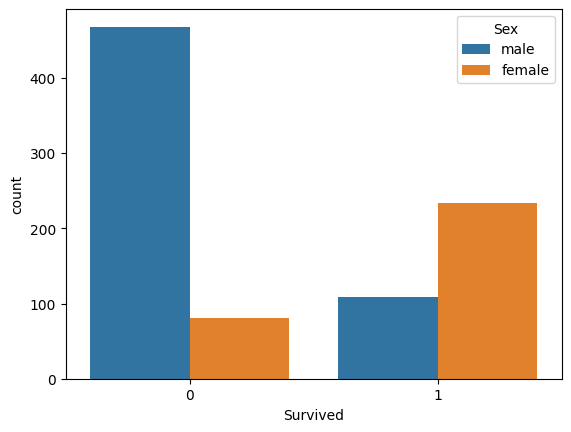

In [61]:
sns.countplot(data=train, x='Survived', hue='Sex')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

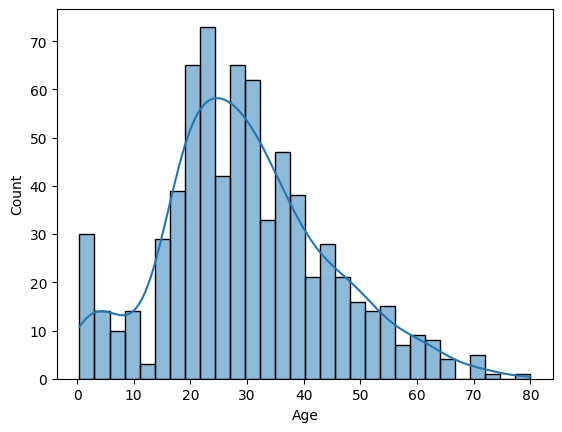

In [71]:
sns.histplot(data=train['Age'].dropna(), bins=30, kde=True)

In [72]:
train = train.drop(['Cabin', 'Ticket', 'Name'], axis=1)
test = test.drop(['Cabin', 'Ticket', 'Name'], axis=1)

In [76]:
train = train.fillna({'Age': train['Age'].median(), 'Embarked': 'S'})
test = test.fillna({'Age': test['Age'].median(), 'Embarked': 'S', 'Fare': test['Fare'].median()})

In [ ]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked'])
test = pd.get_dummies(test, columns=['Sex', 'Embarked'])

In [83]:
print(train.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  \
0            1         0       3  22.0      1      0   7.2500       False   
1            2         1       1  38.0      1      0  71.2833        True   
2            3         1       3  26.0      0      0   7.9250        True   
3            4         1       1  35.0      1      0  53.1000        True   
4            5         0       3  35.0      0      0   8.0500       False   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0      True       False       False        True  
1     False        True       False       False  
2     False       False       False        True  
3     False       False       False        True  
4      True       False       False        True  


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
features = train.drop(['Survived', 'PassengerId'], axis=1)
target = train['Survived']
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_val)
print("Random Forest Classifier Accuracy:", accuracy_score(y_val, predictions))

Random Forest Classifier Accuracy: 0.8044692737430168


In [90]:
test_predictions = model.predict(test.drop('PassengerId', axis=1))
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_predictions
})
submission.to_csv('../submissions/submission0.csv', index=False)

In [91]:
print(train.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  \
0            1         0       3  22.0      1      0   7.2500       False   
1            2         1       1  38.0      1      0  71.2833        True   
2            3         1       3  26.0      0      0   7.9250        True   
3            4         1       1  35.0      1      0  53.1000        True   
4            5         0       3  35.0      0      0   8.0500       False   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0      True       False       False        True  
1     False        True       False       False  
2     False       False       False        True  
3     False       False       False        True  
4      True       False       False        True  


In [122]:
model1 = RandomForestClassifier(
    n_estimators=50,
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=42,
    bootstrap=True,
    max_features='log2'
)
model1.fit(X_train, y_train)
predictions1 = model1.predict(X_val)
print("Random Forest Classifier Accuracy:", accuracy_score(y_val, predictions1))

Random Forest Classifier Accuracy: 0.8212290502793296


In [94]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': model1.predict(test.drop('PassengerId', axis=1))
})
submission.to_csv('../submissions/submission1.csv', index=False)